In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.linalg import eig
from numpy.linalg import eig

In [2]:
#two dimension dataa
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
print(data)

[[ 3  4]
 [ 2  8]
 [ 6  9]
 [10 12]]


In [5]:
df =pd.DataFrame(data, columns = ["ml","dl"])
df
#example

,ml,dl
0,3,4
1,2,8
2,6,9
3,10,12


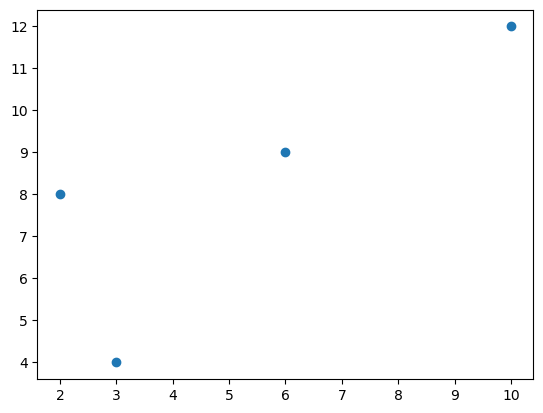

In [6]:
plt.scatter(df["ml"], df["dl"])

# PCA STEPS
1. standardization of data(zero centric)
2. cov matrix
3. eig value and eig vector
4. find principal component

In [7]:
data.T

array([[ 3,  2,  6, 10],
       [ 4,  8,  9, 12]])

In [10]:
meanByCol =np.mean(data.T, axis =1)

In [14]:
scaledData =data-meanByCol
scaledData
#we can also standardize using sklearn. this was for understanding purposes

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [22]:
covmat =np.cov(scaledData.T)
covmat

array([[12.91666667,  9.58333333],
       [ 9.58333333, 10.91666667]])

In [18]:
eigenval, eigvec = np.linalg.eig(covmat)

In [20]:
eigenval

array([21.55203266,  2.28130068])

In [21]:
eigvec

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [23]:
scaledData

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [27]:
#order of eigvec and scaledData is different.
#we dot produt it with keeping in mind the order
dotproduct = eigvec.T.dot(scaledData.T).T
dotproduct

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [28]:
from sklearn.decomposition import PCA
pca = PCA()

In [32]:
pca.fit_transform(scaledData)
#same as above matrix

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [30]:
pd.DataFrame(data = pca.fit_transform(scaledData), columns = ["PC1", "PC2"] )

,PC1,PC2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [31]:
pca.inverse_transform(pca.fit_transform(scaledData))

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [33]:
pca.explained_variance_ratio_

array([0.90428109, 0.09571891])

In [34]:
0.90428109+ 0.09571891

1.0

means both components are cumulativly giving me 100% of information.

PC1 is representing 90% of data but PC2 in covering only 9%.

therefore we will choose PC1 as main component if we had to choose a mean compinent

# now doing PCA on actual dataset

In [35]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
newdf = df.drop(labels= ['Type'],axis=1)
newdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [38]:
newdf.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [45]:
# PCA 
# step-1 standardization of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaledData = scaler.fit_transform(newdf)
scaledDf = pd.DataFrame(data = scaledData, columns = newdf.columns)
scaledDf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [47]:
scaledDf.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,-2.877034e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.191393e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-1.328117e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-2.988264e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.525091e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,3.527811e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.154278e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-6.640586e-17,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-3.735330e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


In [48]:
from sklearn.decomposition import PCA
pca = PCA()

In [50]:
pcadf =pd.DataFrame(data = pca.fit_transform(scaledDf))
pcadf.head()
#eigen vector and eigen value has internally been calculated by pca library

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315


In [51]:
var = pca.explained_variance_ratio_
max(var)*100
#component which is representing max data

27.901819179456457

In [52]:
min(var)*100

0.01787575359017249

In [53]:
sum(var)

0.9999999999999998

In [55]:
amount_of_data_lost = 1-0.9999999999999998
amount_of_data_lost

2.220446049250313e-16

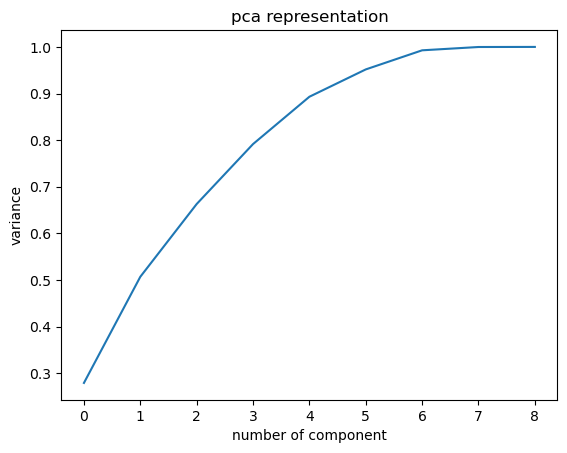

In [56]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel("number of component")
plt.ylabel("variance")
plt.title("pca representation")
plt.show()

after 6 components the graph becomes constant, meaning we are getting most of the data in 6 components only. traditionally there were 9 features. there now we have executed dimension reduction

In [57]:
PCA(n_components=6)

PCA(n_components=6)

quick question

when and when not to use PCA?

ans - when i have data which is distributed linearly, then by pca, mt loss will be minimal.
therefore we should use pca when there is minimum loss by pca. which is in linear.
anti-examples: spherical data, clustered data etc.

data like spherical data etc. we can try feeature selection